In [19]:
import sys
from os.path import join
import warnings
warnings.simplefilter('ignore')

import numpy as np
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

from coreml.config import Config
from coreml.data.dataloader import get_dataloader
from coreml.utils.io import read_yml

In [37]:
config = Config('../configs/resnet18/cifarbaseline-rot-jitter.yml')

In [38]:
dataloader, dataset = get_dataloader(
        config.data, 'train',
        config.model['batch_size'],
        num_workers=10,
        shuffle=False,
        drop_last=False)

=> Loading dataset version file: [siim-isic-melanoma, v3.0.0, train]


Loading items: 100%|██████████| 39015/39015 [00:00<00:00, 846594.40it/s]


In [39]:
iterator = tqdm(dataloader)
signals = []

for index, batch in enumerate(iterator):
    signals.append(batch['signals'])
    if index == 10:
        break

 13%|█▎        | 10/77 [02:49<18:55, 16.95s/it] 


In [40]:
signals = torch.cat(signals)

In [41]:
signals.shape

torch.Size([5632, 3, 224, 224])

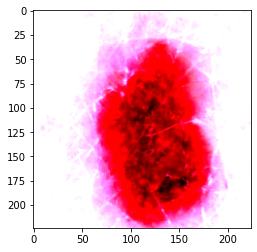

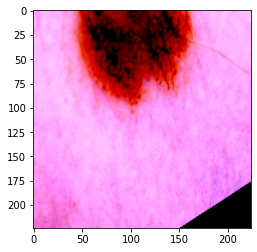

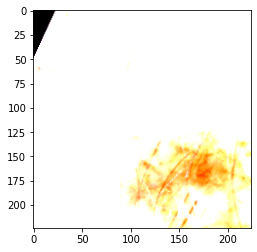

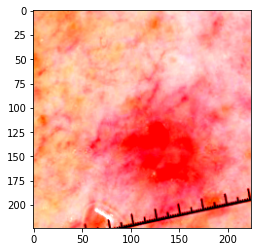

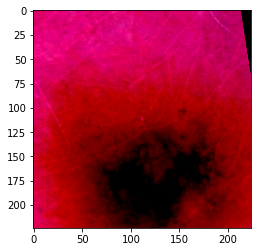

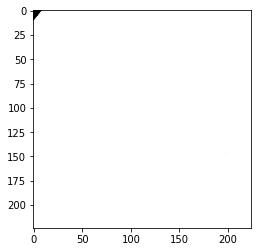

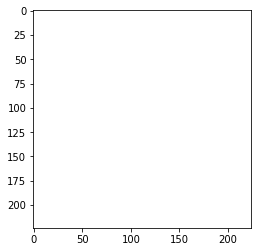

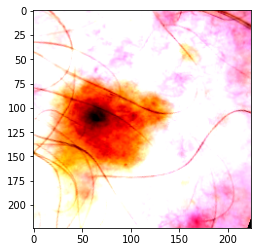

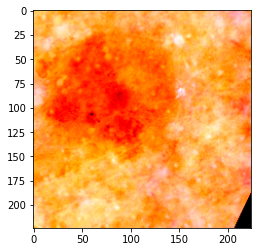

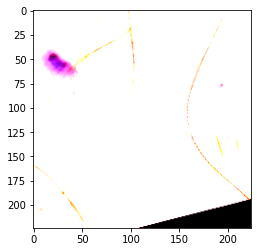

In [42]:
num = 10

for index in range(num):
    im = signals[index]
    im = im.permute(1, 2, 0)
    plt.imshow(im)
    plt.show()